# LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# DATA LOAD

In [2]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"/kaggle/input/10-000-ad/11-agu/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"/kaggle/input/10-000-ad/11-agu/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"/kaggle/input/10-000-ad/11-agu/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 8000 files belonging to 4 classes.
Found 1000 files belonging to 4 classes.
Found 1000 files belonging to 4 classes.


In [3]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild Dim', 'Non Dem', 'VeryMildDem', 'ag-Mod Dem']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# EXAMPLE IMAGE

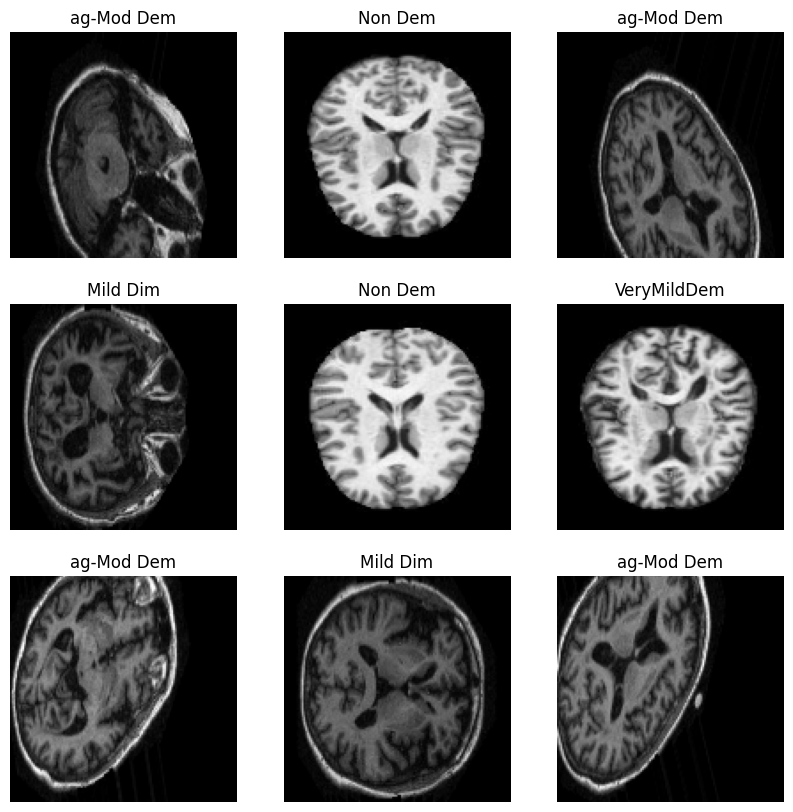

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

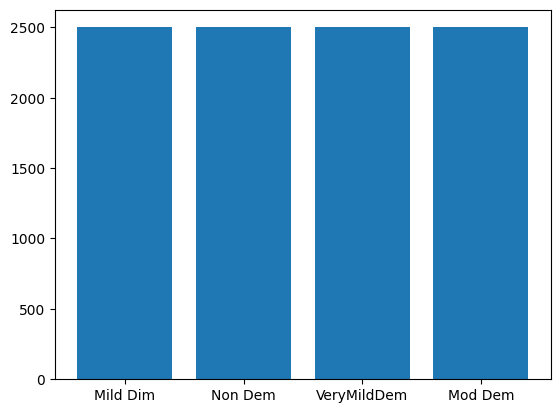

In [5]:
import matplotlib.pyplot as plt

class_names = ['Mild Dim', 'Non Dem', 'VeryMildDem', 'Mod Dem']
size = [2500,2500,2500,2500]

fig, ax = plt.subplots()
ax.bar(class_names, size)

plt.show()


# MODEL

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
# model.add(keras.layers.Dense(512,activation="relu",kernel_initializer="he_normal"))
# model.add(keras.layers.Dense(256,"relu"))
# model.add(keras.layers.Dense(128,"relu"))
# model.add(keras.layers.Dense(256,"elu"))
# model.add(keras.layers.Dense(64,"relu"))    
model.add(keras.layers.Dense(4,"softmax"))

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [9]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=256, verbose=1)

Epoch 1/100


2024-01-06 19:37:32.161282: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 [==============================] - 14s 64ms/step - loss: 0.8041 - accuracy: 0.6626 - val_loss: 0.5866 - val_accuracy: 0.7350
Epoch 2/100
125/125 [==============================] - 4s 34ms/step - loss: 0.4876 - accuracy: 0.7825 - val_loss: 0.4463 - val_accuracy: 0.8060
Epoch 3/100
125/125 [==============================] - 4s 33ms/step - loss: 0.4102 - accuracy: 0.8201 - val_loss: 0.3752 - val_accuracy: 0.8290
Epoch 4/100
125/125 [==============================] - 5s 36ms/step - loss: 0.3288 - accuracy: 0.8614 - val_loss: 0.2998 - val_accuracy: 0.8770
Epoch 5/100
125/125 [==============================] - 5s 34ms/step - loss: 0.2639 - accuracy: 0.8913 - val_loss: 0.2304 - val_accuracy: 0.9160
Epoch 6/100
125/125 [==============================] - 4s 34ms/step - loss: 0.2227 - accuracy: 0.9096 - val_loss: 0.2365 - val_accuracy: 0.8950
Epoch 7/100
125/125 [==============================] - 5s 36ms/step - loss: 0.1795 - accuracy: 0.9305 - val_loss: 0.1555 - val_accuracy: 0.9410
Epo

# Plot the result


In [10]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

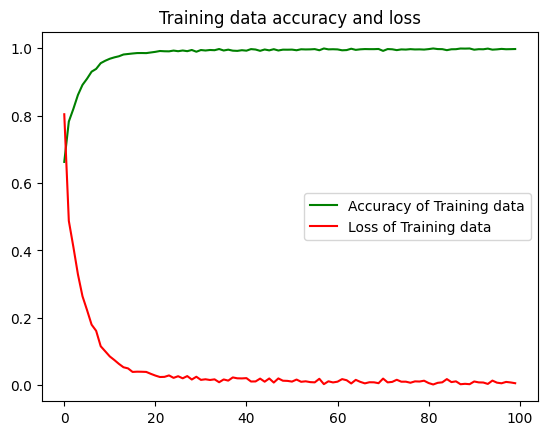

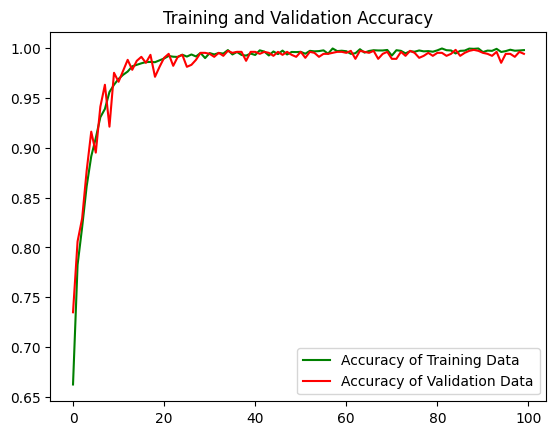

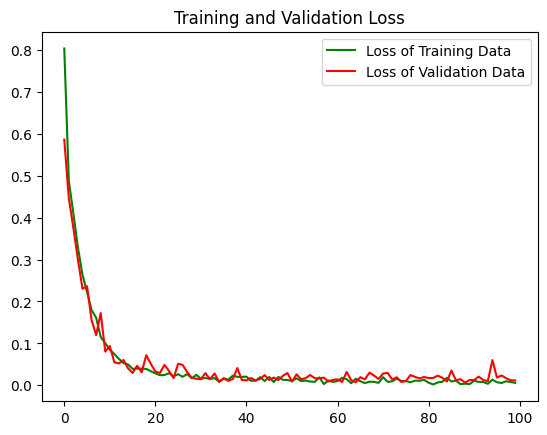

<Figure size 640x480 with 0 Axes>

In [11]:

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Predictions

In [12]:
loss, accuracy = model.evaluate(test_ds)

16/16 [==============================] - 1s 31ms/step - loss: 0.0070 - accuracy: 0.9980


1/1 [==============================] - 0s 19ms/step


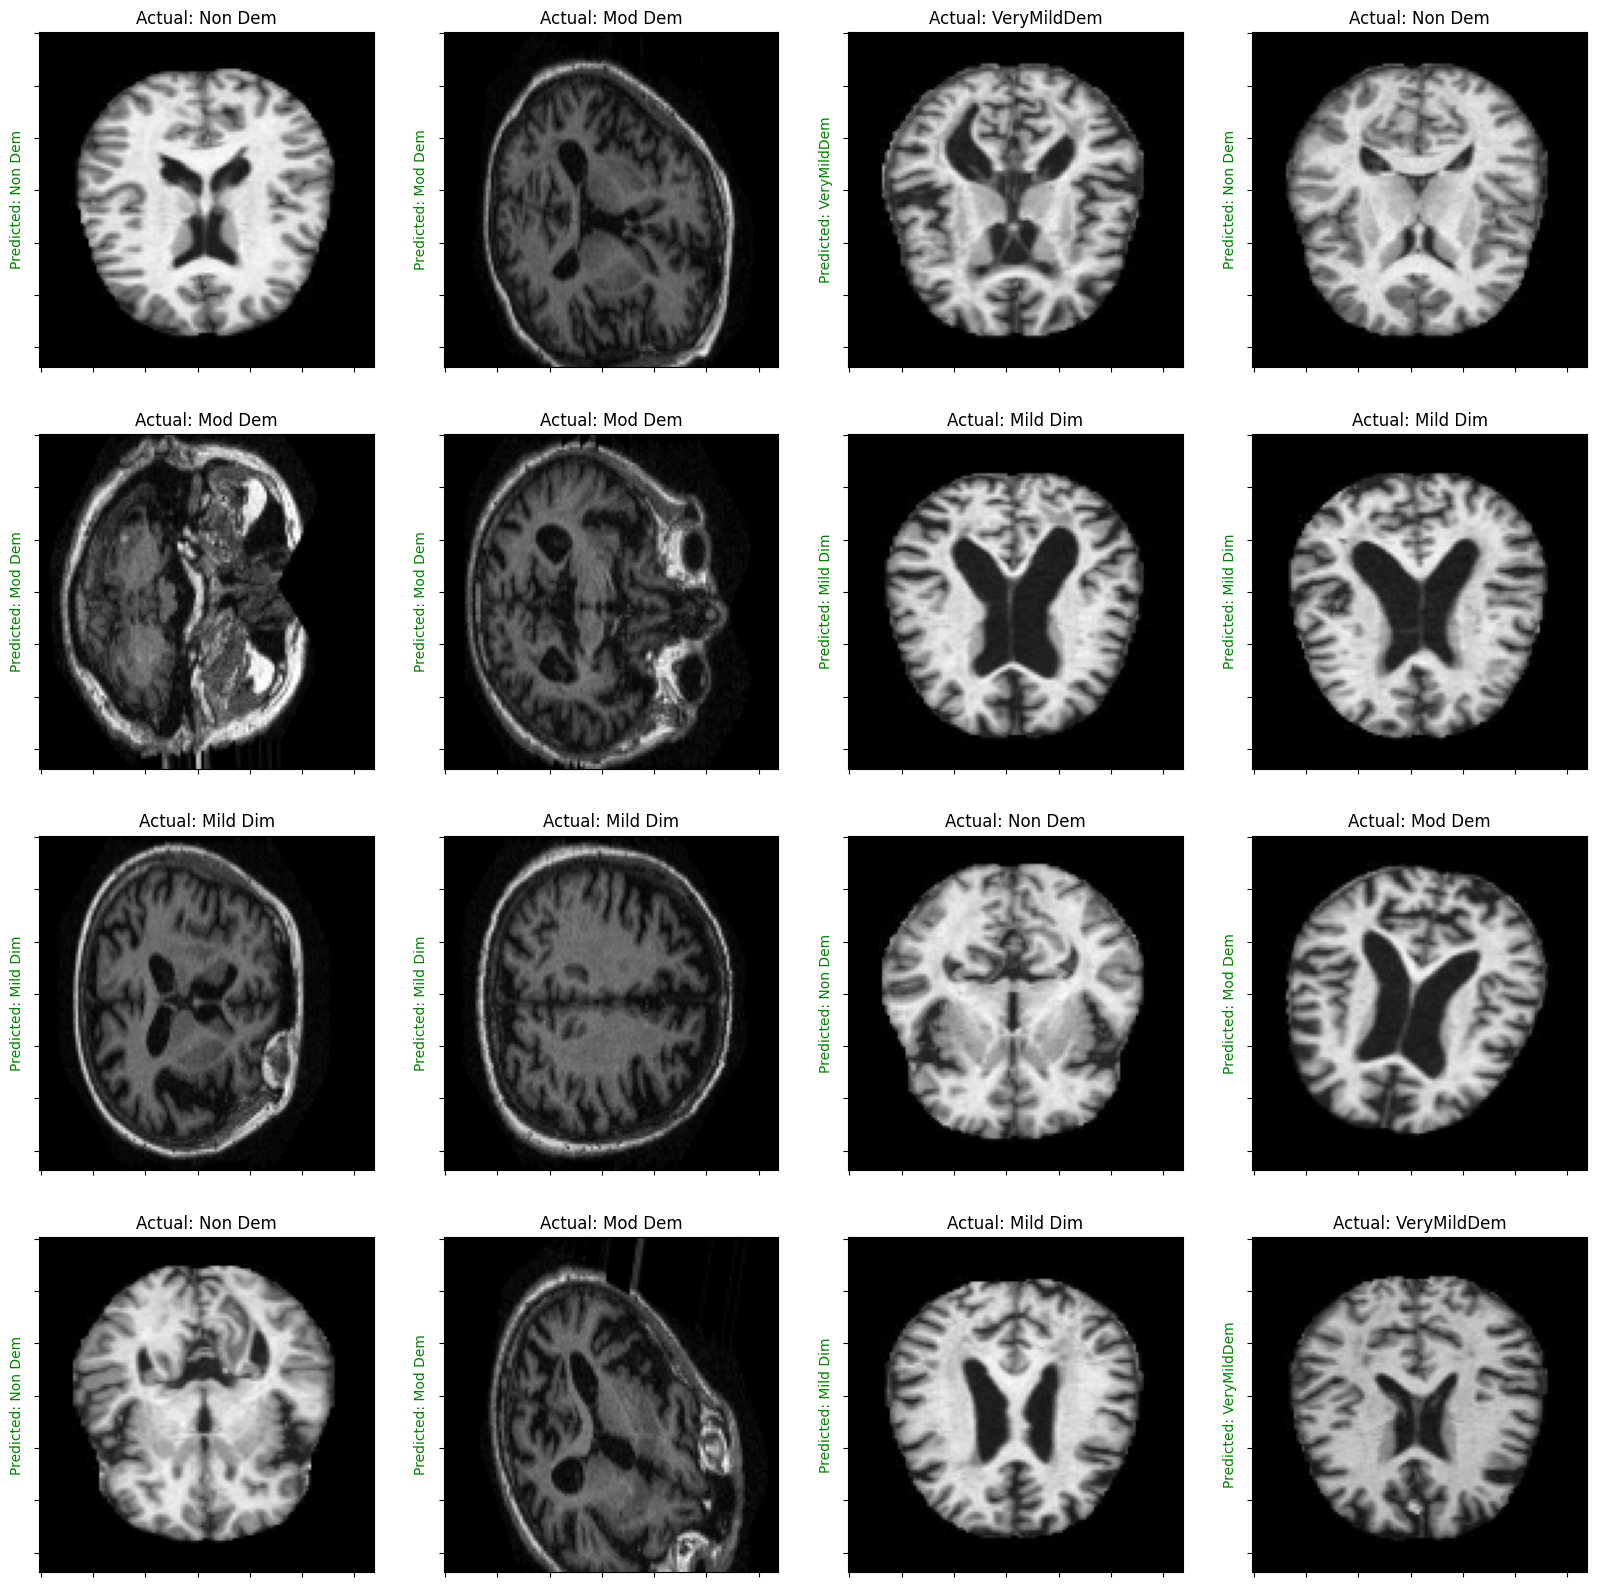

In [13]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

2/2 [==============================] - 0s 110ms/step


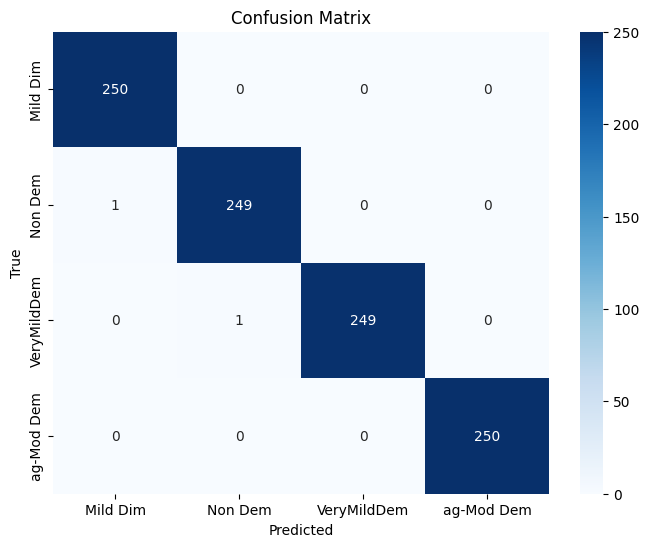

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test dataset
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Get class names for the x and y axis
class_names = test_ds.class_names

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test dataset
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

# Print precision, recall, F1 score, and accuracy
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


2/2 [==============================] - 0s 3ms/step
Precision: 0.998003984063745
Recall: 0.998
F1 Score: 0.997999995999984
Accuracy: 0.998
